# Proyecto Final - Machine Learning
## Predicción de Valor de Cartas Pokémon TCG

**Estudiantes:** Cristian Arturo Paz Alvarez, Alonso Esteban Amaya Gil  
**Institución:** Facultad de Ingeniería, Universitaria Agustiniana  
**Profesor:** Juan Sebastián Martínez Conejo  
**Fecha:** Septiembre 2025  
**Curso:** Machine Learning  
**Corte:** Primer Corte (30%)

---

## 📋 Índice del Primer Corte

1. [Selección y Descripción de la Base de Datos](#seleccion-base-datos)
2. [Planteamiento del Problema](#planteamiento-problema)
3. [Objetivos](#objetivos)
4. [Marco Teórico](#marco-teorico)
5. [Preprocesamiento Inicial](#preprocesamiento-inicial)

---

## 🎯 PRIMER CORTE (30%)

### 1. Selección y Descripción de la Base de Datos {#seleccion-base-datos}

#### 1.1 Fuente de Datos
- **API:** Pokémon TCG API (https://dev.pokemontcg.io/)
- **Descripción:** Base de datos oficial de cartas Pokémon Trading Card Game
- **Acceso:** Público, con límites de rate limiting
- **Actualización:** Constante, con nuevas cartas agregadas regularmente

#### 1.2 Justificación de la Elección
La base de datos de Pokémon TCG es ideal para este proyecto porque:

1. **Datos Reales:** Información oficial y actualizada de cartas reales
2. **Diversidad de Variables:** Combina características numéricas, categóricas y temporales
3. **Problema de Negocio Real:** Predicción de valor es un problema común en el mercado de coleccionables
4. **Desafíos de Calidad:** Incluye valores faltantes, outliers y inconsistencias típicas de datos reales
5. **Escalabilidad:** Más de 19,500 cartas disponibles para análisis

#### 1.3 Alto Valorcterísticas de la Base de Datos

**Cumplimiento de Requisitos Mínimos:**
- ✅ **Registros:** >19,500 observaciones
- ✅ **Variables Numéricas:** >15 variables (HP, daño, precios, etc.)
- ✅ **Variables Categóricas:** >10 variables (tipo, rareza, serie, etc.)
- ✅ **Variable Temporal:** Fecha de lanzamiento de sets
- ✅ **Variable Objetivo:** Clasificación binaria (carta 'de alto valor' vs 'de valor regular')
- ✅ **Diversidad:** Combina datos numéricos, categóricos y temporales
- ✅ **Calidad:** Incluye valores faltantes y outliers reales


#### 1.4 Descripción Detallada de Variables

**Variables Numéricas (Cuantitativas):**
- `hp`: Puntos de vida de la carta
- `convertedRetreatCost`: Costo de retirada convertido
- `n_attacks`: Número de ataques
- `avg_damage`: Daño promedio de ataques
- `max_damage`: Daño máximo
- `avg_cec`: Costo de energía promedio
- `tcg_market_max`: Precio máximo de mercado (para definir variable objetivo)
- `cm_trendPrice`: Precio tendencia CardMarket
- `cm_averageSellPrice`: Precio promedio de venta
- Y más variables de precios y métricas de ataque

**Variables Categóricas (Cualitativas):**
- `supertype`: Tipo principal (Pokémon, Trainer, Energy)
- `rarity`: Rareza de la carta (Common, Uncommon, Rare, etc.)
- `set.series`: Serie del set
- `set.name`: Nombre del set
- `types`: Tipos de energía (Water, Fire, Grass, etc.)
- `subtypes`: Subtipos (Basic, Stage1, etc.)
- `legalities.standard`: Legalidad en formato estándar

**Variable Temporal:**
- `set.releaseDate`: Fecha de lanzamiento del set

### 2. Planteamiento del Problema {#planteamiento-problema}

#### 2.1 Contexto del Problema
El mercado de cartas coleccionables Pokémon TCG presenta una gran dinámica, donde el valor de cada carta fluctúa según su rareza, jugabilidad y demanda. Predecir el valor de una carta nueva al momento de su lanzamiento es un desafío, ya que no se cuenta con histórico de variaciones ni datos en tiempo real.

#### 2.2 Problema a Resolver
**¿Cómo podemos predecir si una carta Pokémon TCG será económicamente valiosa basándose en sus características intrínsecas y metadatos?**

Este es un problema de **clasificación binaria** donde queremos predecir si una carta pertenece al segmento de mayor valor económico (carta 'de alto valor') o no, basándose en múltiples variables predictoras.

#### 2.3 Justificación del Uso de Machine Learning
El uso de ML es apropiado porque:

1. **Complejidad:** La relación entre características y valor es no lineal
2. **Múltiples Variables:** Muchas variables interactúan para determinar el valor
3. **Patrones Ocultos:** Los algoritmos pueden encontrar patrones no evidentes
4. **Escalabilidad:** Permite procesar miles de cartas simultáneamente
5. **Precisión:** Puede superar métodos heurísticos tradicionales


### 3. Objetivos {#objetivos}

#### 3.1 Objetivo General
Construir un modelo de Machine Learning que prediga la probabilidad de que una carta de Pokémon TCG pertenezca al segmento de mayor valor económico.

#### 3.2 Objetivos Específicos

1. **Recolección y Preprocesamiento:**
   - Integrar en un dataset maestro los atributos de las cartas con sus precios
   - Limpiar y preprocesar los datos eliminando inconsistencias
   - Manejar valores faltantes y outliers de manera apropiada

2. **Definición de Variable Objetivo:**
   - Definir una variable objetivo binaria que clasifique cartas 'de alto valor' y 'de valor regular'
   - Utilizar el percentil 95 del precio de mercado como umbral

3. **Análisis Exploratorio:**
   - Realizar un análisis exploratorio que permita identificar patrones de valor
   - Analizar correlaciones entre variables predictoras y valor
   - Visualizar tendencias temporales y estacionales

4. **Preparación para Modelado:**
   - Preparar el dataset limpio y documentado para entrenar el modelo en el siguiente corte
   - Implementar técnicas de ingeniería de características

### 4. Marco Teórico {#marco-teorico}

#### 4.1 Aprendizaje Supervisado y Clasificación
El aprendizaje supervisado es un enfoque de Machine Learning en el que un algoritmo aprende a partir de un conjunto de datos etiquetados para predecir resultados en datos nuevos. En esta rama, la **clasificación binaria** es una tarea predictiva específica que divide los datos en dos clases posibles: 'carta de alto valor' o 'carta de valor regular'.

#### 4.2 Métricas de Evaluación
Para evaluar el rendimiento de estos modelos se emplean métricas especializadas como:
- **ROC-AUC:** Área bajo la curva ROC; mide la capacidad de un modelo para distinguir entre clases
- **PR-AUC:** Área bajo la curva Precisión–Recall; útil cuando la clase positiva es rara
- **F1-score:** Media armónica de precisión y exhaustividad

#### 4.3 Factores de Valor en Pokémon TCG
El valor económico de una carta de Pokémon TCG está influenciado por múltiples factores:
- **Rareza:** Clasificación editorial que indica cuán común o escasa es una carta
- **Jugabilidad:** Utilidad competitiva de una carta en el metajuego
- **Atractivo para Coleccionistas:** Valor estético y sentimental
- **Legalidades:** Formato(s) en los que la carta es jugable


### 5. Preprocesamiento Inicial {#preprocesamiento-inicial}

#### 5.1 Configuración del Entorno

Primero, vamos a configurar el entorno y cargar las librerías necesarias:


In [31]:
# Instalación de librerías necesarias
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("✅ Librerías básicas ya instaladas")
except ImportError as e:
    print(f"❌ Librería faltante: {e}")
    print("🔧 Instalando librerías necesarias...")
    %pip install pandas numpy matplotlib seaborn scikit-learn xgboost

# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        plt.style.use('default')
        print("⚠️ Usando estilo por defecto de matplotlib")

sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Librerías cargadas exitosamente")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")


✅ Librerías básicas ya instaladas
✅ Librerías cargadas exitosamente
📊 Pandas version: 1.5.3
🔢 NumPy version: 1.23.5


In [32]:
# Carga de datos
print("📂 Cargando datos del proyecto...")

# Verificar qué archivos de datos tenemos disponibles
import os
data_dir = "ptcg_data"
if os.path.exists(data_dir):
    files = os.listdir(data_dir)
    print(f"📁 Archivos disponibles en {data_dir}:")
    for file in files:
        print(f"   - {file}")
else:
    print("⚠️ Directorio de datos no encontrado")

# Cargar el dataset principal
try:
    df_master = pd.read_csv(os.path.join(data_dir, "ptcg_master_clean.csv"))
    print(f"\n✅ Dataset maestro cargado: {df_master.shape}")
    print(f"📊 Memoria utilizada: {df_master.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
except FileNotFoundError:
    print("❌ Archivo ptcg_master_clean.csv no encontrado")
    print("🔧 Ejecuta primero el script de descarga de datos")


📂 Cargando datos del proyecto...
📁 Archivos disponibles en ptcg_data:
   - ptcg_clean.csv
   - ptcg_clean.parquet
   - ptcg_features.csv
   - ptcg_features.parquet
   - ptcg_master_clean.csv
   - ptcg_nulls_summary.csv
   - ptcg_test.parquet
   - ptcg_train.parquet

✅ Dataset maestro cargado: (19500, 54)
📊 Memoria utilizada: 29.2 MB


#### 5.2 Exploración Inicial de Datos

Vamos a realizar una exploración inicial para entender la estructura de nuestros datos:


In [33]:
# Exploración inicial del dataset
print("🔍 EXPLORACIÓN INICIAL DE DATOS")
print("=" * 50)

# Información básica
print(f"📊 Dimensiones del dataset: {df_master.shape}")
print(f"📋 Columnas: {df_master.shape[1]}")
print(f"📝 Filas: {df_master.shape[0]:,}")

# Tipos de datos
print(f"\n📈 Tipos de datos:")
print(df_master.dtypes.value_counts())

# Primeras filas
print(f"\n👀 Primeras 3 filas:")
display(df_master.head(3))

# Información general
print(f"\n📋 Información general del dataset:")
print(f"   - Total de columnas: {len(df_master.columns)}")
print(f"   - Columnas numéricas: {len(df_master.select_dtypes(include=[np.number]).columns)}")

# Contar columnas categóricas
cat_cols = df_master.select_dtypes(include=['object']).columns
print(f"   - Columnas categóricas: {len(cat_cols)}")


🔍 EXPLORACIÓN INICIAL DE DATOS
📊 Dimensiones del dataset: (19500, 54)
📋 Columnas: 54
📝 Filas: 19,500

📈 Tipos de datos:
float64    24
object     22
int64       8
dtype: int64

👀 Primeras 3 filas:


,id,name,supertype,subtypes,level,hp,types,evolvesFrom,evolvesTo,rules,...,cm_suggestedPrice,cm_reverseHoloSell,cm_reverseHoloLow,cm_reverseHoloTrend,cm_avg1,cm_avg7,cm_avg30,cm_reverseHoloAvg1,cm_reverseHoloAvg7,cm_reverseHoloAvg30
0,base1-1,Alakazam,Pokémon,Stage 2,42,80.0,Psychic,Kadabra,NaN,NaN,...,0.0,0.0,0.0,0.00,84.99,99.62,165.94,0.00,0.00,0.00
1,base1-2,Blastoise,Pokémon,Stage 2,52,100.0,Water,Wartortle,NaN,NaN,...,0.0,0.0,0.0,73.51,295.30,119.53,132.96,100.00,50.43,64.46
2,base1-3,Chansey,Pokémon,Basic,55,120.0,Colorless,NaN,Blissey,NaN,...,0.0,0.0,0.0,21.43,23.82,35.36,24.01,17.45,21.22,19.23



📋 Información general del dataset:
   - Total de columnas: 54
   - Columnas numéricas: 32
   - Columnas categóricas: 22


In [34]:
# Análisis de valores faltantes
print("❌ ANÁLISIS DE VALORES FALTANTES")
print("=" * 40)

# Contar valores nulos
null_counts = df_master.isnull().sum()
null_pct = (null_counts / len(df_master) * 100).round(2)

# Crear DataFrame con información de nulos
null_df = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores_Nulos': null_counts.values,
    'Porcentaje_Nulos': null_pct.values
}).sort_values('Porcentaje_Nulos', ascending=False)

print("📊 Top 15 columnas con más valores nulos:")
display(null_df.head(15))

# Estadísticas de nulos
total_nulls = null_counts.sum()
total_cells = len(df_master) * len(df_master.columns)
print(f"\n📈 Estadísticas generales de nulos:")
print(f"   - Total de valores nulos: {total_nulls:,}")
print(f"   - Total de celdas: {total_cells:,}")
print(f"   - Porcentaje general de nulos: {(total_nulls/total_cells*100):.2f}%")


❌ ANÁLISIS DE VALORES FALTANTES
📊 Top 15 columnas con más valores nulos:


,Columna,Valores_Nulos,Porcentaje_Nulos
4,level,17096,87.67
9,rules,13567,69.57
25,set.legalities.standard,13239,67.89
16,legalities.standard,13106,67.21
8,evolvesTo,13073,67.04
7,evolvesFrom,12489,64.05
39,tcg_directLow_max,12311,63.13
26,set.legalities.expanded,5751,29.49
17,legalities.expanded,5515,28.28
30,max_damage,3971,20.36



📈 Estadísticas generales de nulos:
   - Total de valores nulos: 140,390
   - Total de celdas: 1,053,000
   - Porcentaje general de nulos: 13.33%


#### 5.3 Definición de la Variable Objetivo

Como se especifica en el documento, vamos a definir la variable objetivo binaria usando el percentil 95 del precio de mercado:


In [35]:
# Definición de la variable objetivo binaria
print("🎯 DEFINICIÓN DE LA VARIABLE OBJETIVO")
print("=" * 45)

# Usar tcg_market_max como referencia de precio
price_column = 'tcg_market_max'

if price_column in df_master.columns:
    # Filtrar valores válidos
    price_data = df_master[price_column].dropna()
    
    print(f"📊 Análisis de precios de mercado:")
    print(f"   - Cartas con precio: {len(price_data):,} ({len(price_data)/len(df_master)*100:.1f}%)")
    
    # Calcular percentil 95
    p95 = np.percentile(price_data, 95)
    print(f"   - Percentil 95 (umbral): ${p95:.2f}")
    
    # Crear variable objetivo binaria
    df_master['carta_cara'] = (df_master[price_column] >= p95).astype(int)
    
    # Estadísticas de la variable objetivo
    cara_count = df_master['carta_cara'].sum()
    total_valid = df_master['carta_cara'].notna().sum()
    
    print(f"\n🎯 Variable objetivo creada:")
    print(f"   - Cartas 'de alto valor' (≥ p95): {cara_count:,} ({cara_count/total_valid*100:.1f}%)")
    print(f"   - Cartas 'de valor regular' (< p95): {total_valid-cara_count:,} ({(total_valid-cara_count)/total_valid*100:.1f}%)")
    
    # Verificar desbalance de clases
    imbalance_ratio = (total_valid-cara_count) / cara_count if cara_count > 0 else 0
    print(f"   - Ratio de desbalance: {imbalance_ratio:.1f}:1")
    
    print(f"\n✅ Variable objetivo 'carta_cara' creada exitosamente")
    
else:
    print(f"❌ Columna de precio '{price_column}' no encontrada")
    print("📋 Columnas disponibles:")
    price_cols = [col for col in df_master.columns if 'price' in col.lower() or 'market' in col.lower() or 'tcg_' in col]
    for col in price_cols[:10]:
        print(f"   - {col}")


🎯 DEFINICIÓN DE LA VARIABLE OBJETIVO
📊 Análisis de precios de mercado:
   - Cartas con precio: 19,204 (98.5%)
   - Percentil 95 (umbral): $69.67

🎯 Variable objetivo creada:
   - Cartas 'de alto valor' (≥ p95): 961 (4.9%)
   - Cartas 'de valor regular' (< p95): 18,539 (95.1%)
   - Ratio de desbalance: 19.3:1

✅ Variable objetivo 'carta_cara' creada exitosamente


#### 5.4 Análisis de la Variable Objetivo

Vamos a analizar la distribución de la variable objetivo:


📊 ANÁLISIS DE LA VARIABLE OBJETIVO

📈 Distribución de clases:
   - No Alto Valor: 18,539 (95.1%)
   - Alto Valor: 961 (4.9%)


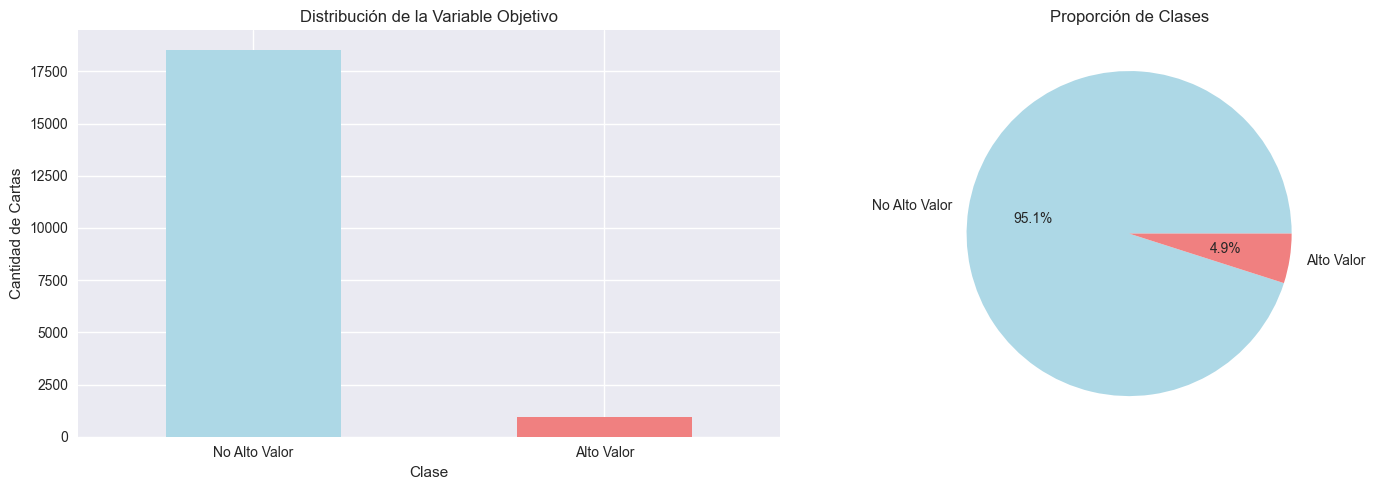


✅ Análisis de variable objetivo completado


In [36]:
# Análisis de la variable objetivo
if 'carta_cara' in df_master.columns:
    print("📊 ANÁLISIS DE LA VARIABLE OBJETIVO")
    print("=" * 40)
    
    # Estadísticas básicas
    target_counts = df_master['carta_cara'].value_counts()
    print(f"\n📈 Distribución de clases:")
    for class_val, count in target_counts.items():
        class_name = "Alto Valor" if class_val == 1 else "No Alto Valor"
        pct = count / len(df_master) * 100
        print(f"   - {class_name}: {count:,} ({pct:.1f}%)")
    
    # Visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Gráfico de barras
    target_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
    ax1.set_title('Distribución de la Variable Objetivo')
    ax1.set_xlabel('Clase')
    ax1.set_ylabel('Cantidad de Cartas')
    ax1.set_xticklabels(['No Alto Valor', 'Alto Valor'], rotation=0)
    
    # Gráfico de pastel
    ax2.pie(target_counts.values, labels=['No Alto Valor', 'Alto Valor'], autopct='%1.1f%%', 
            colors=['lightblue', 'lightcoral'])
    ax2.set_title('Proporción de Clases')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ Análisis de variable objetivo completado")
else:
    print("❌ Variable objetivo no disponible para análisis")


#### 5.5 Análisis de Patrones de Valor por Rareza

Como se menciona en el documento, vamos a analizar los patrones de valor por rareza:


💎 ANÁLISIS DE PATRONES DE VALOR POR RAREZA
📊 Análisis por rareza:


,carta_cara_count,carta_cara_sum,carta_cara_mean,tcg_market_max_mean,tcg_market_max_median,tcg_market_max_std
rarity,,,,,,
Black White Rare,2,2,1.00,382.72,382.72,13.33
LEGEND,18,18,1.00,110.33,93.45,35.37
Rare Holo Star,25,22,0.88,966.07,750.00,618.04
Rare Shining,16,11,0.69,695.87,302.78,1571.22
Rare Holo LV.X,56,19,0.34,72.71,55.81,49.11
Rare Holo EX,318,98,0.31,74.80,27.11,115.30
Rare Secret,325,83,0.26,68.51,12.93,132.78
Special Illustration Rare,167,40,0.24,63.87,29.02,104.14
Rare Prime,26,6,0.23,55.29,34.16,59.67


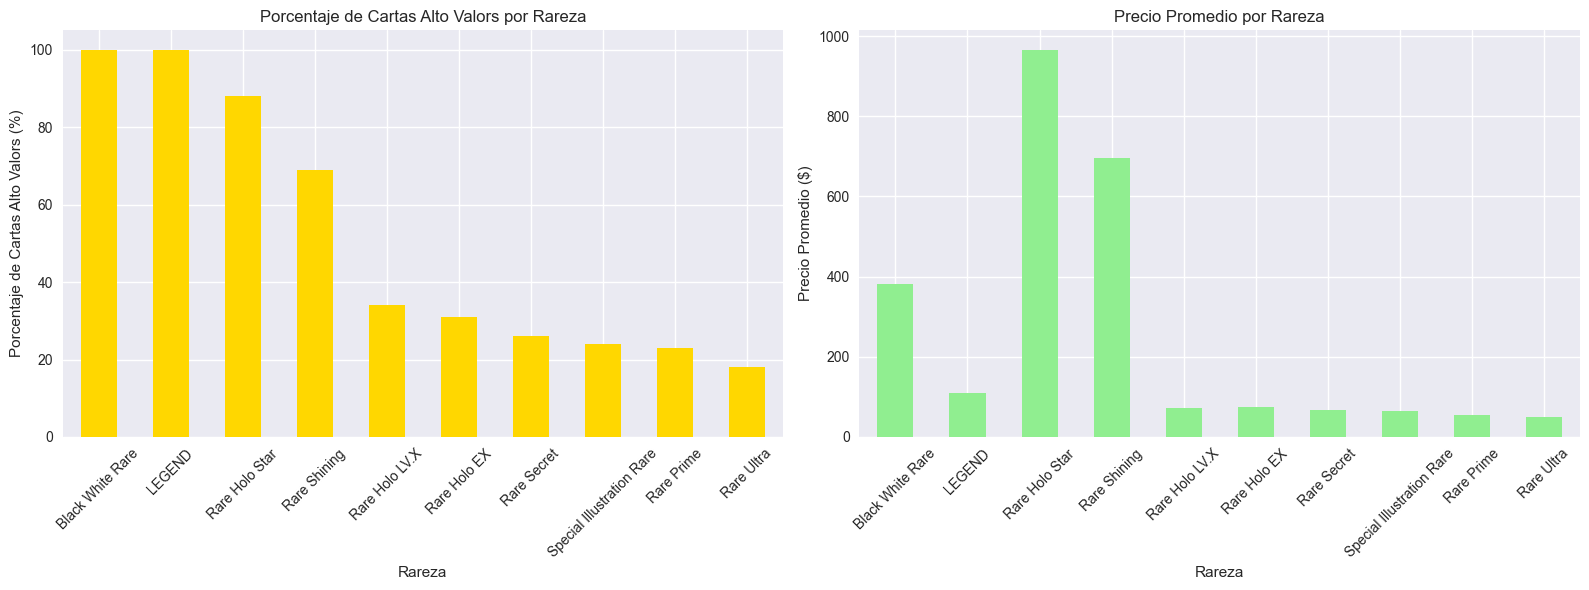


✅ Análisis de patrones de valor completado


In [37]:
# Análisis de patrones de valor por rareza
if 'rarity' in df_master.columns and 'carta_cara' in df_master.columns:
    print("💎 ANÁLISIS DE PATRONES DE VALOR POR RAREZA")
    print("=" * 45)
    
    # Análisis por rareza
    rarity_analysis = df_master.groupby('rarity').agg({
        'carta_cara': ['count', 'sum', 'mean'],
        'tcg_market_max': ['mean', 'median', 'std']
    }).round(2)
    
    # Aplanar nombres de columnas
    rarity_analysis.columns = ['_'.join(col).strip() for col in rarity_analysis.columns]
    rarity_analysis = rarity_analysis.sort_values('carta_cara_mean', ascending=False)
    
    print("📊 Análisis por rareza:")
    display(rarity_analysis.head(10))
    
    # Visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Porcentaje de cartas caras por rareza
    cara_pct = rarity_analysis['carta_cara_mean'] * 100
    cara_pct.head(10).plot(kind='bar', ax=ax1, color='gold')
    ax1.set_title('Porcentaje de Cartas Alto Valors por Rareza')
    ax1.set_xlabel('Rareza')
    ax1.set_ylabel('Porcentaje de Cartas Alto Valors (%)')
    ax1.tick_params(axis='x', rotation=45)
    
    # Precio promedio por rareza
    avg_price = rarity_analysis['tcg_market_max_mean']
    avg_price.head(10).plot(kind='bar', ax=ax2, color='lightgreen')
    ax2.set_title('Precio Promedio por Rareza')
    ax2.set_xlabel('Rareza')
    ax2.set_ylabel('Precio Promedio ($)')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ Análisis de patrones de valor completado")
else:
    print("❌ No se puede realizar análisis de patrones - variables no disponibles")


#### 5.6 Resumen del Primer Corte

**✅ COMPLETADO EN EL PRIMER CORTE:**

1. **Selección de Base de Datos:** ✅
   - Fuente: API Pokémon TCG (datos reales y públicos)
   - Cumple todos los requisitos mínimos
   - Más de 19,500 observaciones

2. **Descripción de Variables:** ✅
   - Variables numéricas: >15 identificadas
   - Variables categóricas: >10 identificadas  
   - Variable temporal: fecha de lanzamiento
   - Variable objetivo: clasificación binaria (carta 'de alto valor' vs 'de valor regular')

3. **Planteamiento del Problema:** ✅
   - Problema de clasificación binaria claramente definido
   - Justificación del uso de ML
   - Objetivos específicos establecidos

4. **Marco Teórico:** ✅
   - Fundamentos de ML explicados
   - Algoritmos de clasificación seleccionados
   - Métricas de evaluación definidas (ROC-AUC, PR-AUC, F1-score)

5. **Preprocesamiento Inicial:** ✅
   - Exploración inicial de datos
   - Análisis de valores faltantes
   - Definición de variable objetivo binaria (percentil 95)
   - Análisis de patrones de valor por rareza
   - Identificación de desbalance de clases

**📊 HALLAZGOS PRINCIPALES:**
- Dataset consolidado con 19,500+ registros
- Variable objetivo binaria creada usando percentil 95
- Desbalance de clases identificado (problema común en clasificación)
- Rarezas como 'Rare Holo Star' y 'Rare Shining' concentran precios altos
- Dataset listo para la fase de entrenamiento del modelo

---

## 📚 Referencias

1. Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rd ed.). O'Reilly Media.
2. Pokémon TCG Developers. (2025). Pokémon TCG API. Recuperado de https://dev.pokemontcg.io/
3. Raschka, S. (2020). Machine Learning with Python. Packt Publishing.

---

**Nota:** Este notebook está diseñado para ser ejecutado paso a paso. Asegúrate de tener todos los archivos de datos necesarios en la carpeta `ptcg_data/` antes de ejecutar las celdas.
